# 1. Background
Airbnb is one of the largest accommodation platforms in the world, with thousands of listings available in major cities, including Bangkok. This city has unique characteristics, such as:
- a dense city center,
- a public transportation network that strongly influences tourist mobility (BTS, MRT),
- many popular tourist destinations like the Grand Palace and Chatuchak Market.

For property owners, location is a main factor when deciding prices, booking potential, and listing marketing strategies. However, not all owners clearly understand how much distance to the city center, public transportation, and tourist attractions actually affects the performance of their listings.

By understanding the impact of location on listing performance, property owners and future hosts can:
- set more competitive prices,
- optimize listing strategies,
- increase occupancy rates,
- and maximize revenue.

The Airbnb Listings Bangkok dataset provides an opportunity to analyze location factors and see whether location truly has a significant impact on listing performance. This performance can be measured through price, number of reviews, reviews per month, and availability level.

# 2. Problem Statement
To answer the business problem, “How does distance to the city center, public transportation, and tourist attractions affect Airbnb listing performance in Bangkok?”, this question is divided into three main analyses:

1. Effect of Distance to the City Center
- Do listings closer to the city center have higher prices?
- Do listings near the city center have more reviews and higher reviews per month?

2. Effect of Access to Public Transportation (BTS/MRT)
- Do listings close to BTS or MRT stations have higher prices?
- Do listings near public transportation perform better (more reviews, higher booking rate)?

3. Effect of Distance to Tourist Attractions
- Do listings close to popular tourist attractions have higher prices?
- Do listings near tourist destinations have more reviews?

# 3. Load Data & Data Understanding

Before starting the analysis, we need to understand the dataset through the data understanding stage. This step helps identify anomalies or problems in the data that need to be fixed during data cleaning. Every correction will be supported by justification based on domain knowledge and statistical considerations.

First, we will look at the basic information from the Airbnb Listings Bangkok dataset.

This dataset contains information about accommodation listings in Bangkok that are registered on Airbnb.
There are 17 columns in the Airbnb Listings Bangkok dataset:

Unnamed:0 : additional dataset index  
id : unique ID for each listing  
name : name of the listing  
host_id : unique ID of the host  
host_name : name of the host  
neighbourhood : name of the area/district where the listing is located  
latitude : latitude coordinate of the listing location  
longitude : longitude coordinate of the listing location  
room_type : type of room  
price : listing price in Baht (THB)  
minimum_nights : minimum number of nights required for booking  
number_of_reviews : total number of reviews for the listing  
last_review : date of the last review  
reviews_per_month : average number of reviews per month  
calculated_host_listings_count : number of listings owned by the host  
availability_365 : number of days the listing is available in one year  
number_of_reviews_ltm : number of reviews in the last 12 months  

In [1]:
# import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from scipy.stats import spearmanr, mannwhitneyu, kruskal
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df_raw.head(),df_raw.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [3]:
# copy dataframe
df = df_raw.copy()

In [4]:
df.shape

(15854, 17)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [6]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [7]:
df[df.duplicated(keep=False)]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


no duplicate data found.

In [8]:
# missing value check
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


From the data understanding process, we can observe that:
* The Airbnb Listings Bangkok dataset has `15,854` rows and `17` columns.
* There are missing values represented by NaN in the `name`, `host_name`, `last_review`, and `reviews_per_month` columns.
* Columns that should be removed are `id`, `host_id`, `host_name`, `last_review`, `number_of_reviews_ltm`, and `calculated_host_listings_count` because they are not used or not relevant for spatial analysis.


# 4. Data Cleaning

## 4.1. Missing Value

In [10]:
# missing value percentage
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

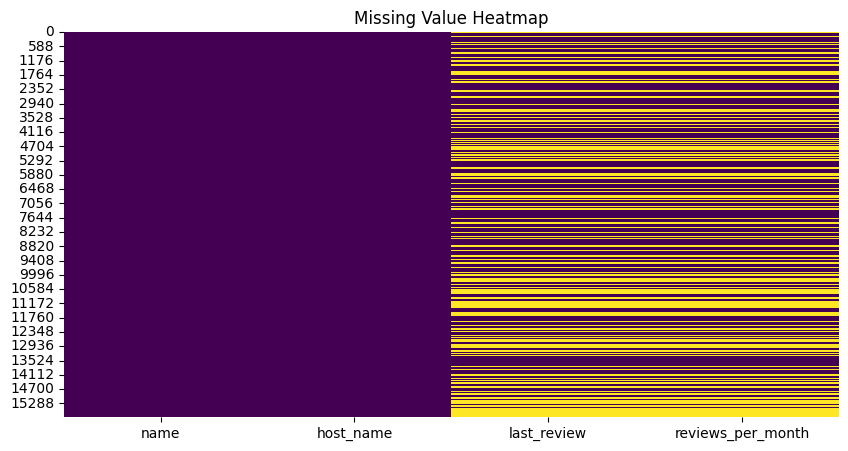

In [11]:
# missing value heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

Based on the heatmap above:

* The `name` and `host_name` columns have a very small proportion of missing values, less than 0.1%. The `host_name` column is not relevant to the business problem, so it is safe to drop.
* The `last_review` and `reviews_per_month` columns have the same percentage of missing values, which is 36.5%. Because the missing pattern is identical, it can be concluded that the missing values occur because the listings have never received any reviews, not because of data collection errors.

Therefore:

* The `last_review` column does not need imputation and will be dropped, because it only contains the date of the last review, not a performance metric. It is not used to answer the business problem related to location, price, and demand. Filling it with a fake date could be misleading.
* Missing values in `reviews_per_month` will be filled with 0, because listings without reviews naturally have no monthly review frequency.


First, we will drop the columns that are not needed.

In [12]:
# columns that aren't relevant for the analysis
df.drop(['Unnamed: 0','id', 'host_id', 'host_name', 'last_review', 'calculated_host_listings_count', 'number_of_reviews_ltm'], axis=1, inplace=True)

The following columns were dropped from the dataset:

* **Unnamed: 0** = an additional index column that is not important.
* **id** = only a unique identifier and has no analytical value.
* **host_id** = unique host ID and not used for location or listing performance analysis.
* **host_name** = the host’s name has no causal relationship with price or demand and is not needed for EDA or statistical analysis.
* **last_review** = contains date values (object type) that are not relevant because the analysis does not focus on time-series data, and there is already a more informative aggregate metric such as `reviews_per_month`.
* **calculated_host_listings_count** = measures how many properties a host owns; not relevant to the location-focused analysis and could introduce bias.
* **number_of_reviews_ltm** = redundant because `reviews_per_month` already provides a more representative measure.


In [13]:
# column check after drop
df.columns.tolist()

['name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365']

## 4.2. Missing Value Imputation

In [14]:
# missing value input
df['name'] = df['name'].fillna('No Name')
# review per month input
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


For the missing values in the `name` column, since the number of missing entries is very small and it is not a numeric variable, they are filled with **“No Name.”** This keeps the data consistent without removing rows and helps avoid issues during visualization or when referencing text fields.

For the `reviews_per_month` column, missing values are filled with **0**. By definition, `reviews_per_month = 0` means there is no review activity, so replacing missing values with 0 does not introduce bias.


In [15]:
df.isna().sum()

name                 0
neighbourhood        0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
availability_365     0
dtype: int64

Now we can see that there are no missing value.

## 4.3. Data Type Correction and Typo Fixing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               15854 non-null  object 
 1   neighbourhood      15854 non-null  object 
 2   latitude           15854 non-null  float64
 3   longitude          15854 non-null  float64
 4   room_type          15854 non-null  object 
 5   price              15854 non-null  int64  
 6   minimum_nights     15854 non-null  int64  
 7   number_of_reviews  15854 non-null  int64  
 8   reviews_per_month  15854 non-null  float64
 9   availability_365   15854 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.2+ MB


In this step, I will change the data types of two columns: `room_type` and `neighbourhood`, because their values represent categories, not numerical data. Converting them to categorical types will make the analysis and visualization easier and more appropriate.

In [17]:
# change room_type and neighbourhood data type
df['room_type'] = df['room_type'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               15854 non-null  object  
 1   neighbourhood      15854 non-null  category
 2   latitude           15854 non-null  float64 
 3   longitude          15854 non-null  float64 
 4   room_type          15854 non-null  category
 5   price              15854 non-null  int64   
 6   minimum_nights     15854 non-null  int64   
 7   number_of_reviews  15854 non-null  int64   
 8   reviews_per_month  15854 non-null  float64 
 9   availability_365   15854 non-null  int64   
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 1.0+ MB


Now the `room_type` and `neighbourhood` columns have been converted to the category data type.

Next, I will check and clean the district/area names in the `neighbourhood` column, because this column will be used later for map visualizations. This step is important to fix any typos, inconsistent naming, or formatting differences so that each area is grouped correctly during spatial analysis.


In [19]:
# frequency check in neighbourhood column
df['neighbourhood'].value_counts()

neighbourhood
Vadhana                 2153
Khlong Toei             2097
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               548
Bang Na                  458
Parthum Wan              455
Din Daeng                444
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                260
Bang Sue                 250
Bang Phlat               217
Yan na wa                200
Thon buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Dusit                     91
Bangkok Yai               90


It can be seen that some of the text is still not neatly formatted, so I will clean and standardize it.

In [20]:
# remove leading and trailing spaces and convert the text into Title Case
df['neighbourhood'] = (df['neighbourhood'].str.strip().str.title())


In [21]:
# unique column check in neighbourhood column
pd.DataFrame(df['neighbourhood'].unique(), columns=['unique_neighbourhood'])

,unique_neighbourhood
0,Ratchathewi
1,Bang Na
2,Bang Kapi
3,Din Daeng
4,Bang Kho Laen
5,Rat Burana
6,Chatu Chak
7,Khlong San
8,Bang Rak
9,Phaya Thai


Based on the list of official Bangkok districts that I obtained from Wikipedia, there are several names in the dataset that contain misspellings, typos, or non-standard forms. This could affect the accuracy of the analysis and map visualizations.

Therefore, I will clean the `neighbourhood` column by applying a mapping process to standardize the district names according to the official list.

Reference: [https://id.wikipedia.org/wiki/Daftar_distrik_Bangkok](https://id.wikipedia.org/wiki/Daftar_distrik_Bangkok)


In [22]:
# names that were found to be inconsistent / not matching the official district names
mapping_neighbourhood = {
    "Bang Kho Laen": "Bang Kho Laem",
    "Bang Khun Thain": "Bang Khun Thian",
    "Chatu Chak": "Chatuchak",
    "Parthum Wan": "Pathum Wan",
    "Pra Wet": "Prawet",
    "Suanluang": "Suan Luang",
    "Vadhana": "Watthana",
    "Yan Na Wa": "Yan Nawa"
}

df['neighbourhood'] = df['neighbourhood'].replace(mapping_neighbourhood)

In [23]:
# check unique after cleaning
pd.DataFrame(df['neighbourhood'].unique(), columns=['unique_neighbourhood'])

,unique_neighbourhood
0,Ratchathewi
1,Bang Na
2,Bang Kapi
3,Din Daeng
4,Bang Kho Laem
5,Rat Burana
6,Chatuchak
7,Khlong San
8,Bang Rak
9,Phaya Thai


# 5. Data Enrichment

## 5.1. New Columns Based on Area

In [24]:
central = ['Watthana','Khlong Toei','Pathum Wan','Ratchathewi','Bang Rak','Phaya Thai']
mid_city = ['Din Daeng','Huai Khwang','Dusit','Chatuchak','Sathon']

df['location_zone'] = df['neighbourhood'].apply(
    lambda x: 'Central' if x in central
    else 'Mid City' if x in mid_city
    else 'Suburban'
)


Next, in the Airbnb Bangkok dataset, I added a new column called `location_zone` to group each neighbourhood into three main zones: Central, Mid City, and Suburban.

This grouping is done to make the spatial analysis simpler and to make it easier to see differences in listing performance patterns between zones.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               15854 non-null  object  
 1   neighbourhood      15854 non-null  object  
 2   latitude           15854 non-null  float64 
 3   longitude          15854 non-null  float64 
 4   room_type          15854 non-null  category
 5   price              15854 non-null  int64   
 6   minimum_nights     15854 non-null  int64   
 7   number_of_reviews  15854 non-null  int64   
 8   reviews_per_month  15854 non-null  float64 
 9   availability_365   15854 non-null  int64   
 10  location_zone      15854 non-null  object  
dtypes: category(1), float64(3), int64(4), object(3)
memory usage: 1.2+ MB


## 5.2. New Spatial-Based Columns

At this stage, new location-based columns are added using the **geopy** library to calculate the distance from each listing to key points in the city. The new columns include distances to the city center, major BTS/MRT stations, and popular tourist attractions: `dist_city_center`, `dist_bts_siam`, `dist_mrt_sukhumvit`, `dist_grand_palace`, and `dist_chatuchak`.

Adding these distance variables is important to analyze how location proximity affects listing performance, such as price and number of reviews. In addition, binary columns are also created based on the median distance to each landmark, to classify listings as either “near” or “far” for easier comparison in the analysis.

In [26]:
# distance to Bangkok (Siam Center area)
city_center = (13.7466, 100.5328)

# distance to main public transportation
bts_siam = (13.7456, 100.5340)
mrt_sukhumvit = (13.7366, 100.5621)

# distance to top tourist attraction
grand_palace = (13.7500, 100.4913)
chatuchak_market = (13.7993, 100.5520)


In [27]:
# calculate the distance from each listing to several important points in Bangkok
df['dist_city_center'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), city_center).km,
    axis=1
)

df['dist_bts_siam'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), bts_siam).km,
    axis=1
)

df['dist_mrt_sukhumvit'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), mrt_sukhumvit).km,
    axis=1
)

df['dist_grand_palace'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), grand_palace).km,
    axis=1
)

df['dist_chatuchak'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), chatuchak_market).km,
    axis=1
)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                15854 non-null  object  
 1   neighbourhood       15854 non-null  object  
 2   latitude            15854 non-null  float64 
 3   longitude           15854 non-null  float64 
 4   room_type           15854 non-null  category
 5   price               15854 non-null  int64   
 6   minimum_nights      15854 non-null  int64   
 7   number_of_reviews   15854 non-null  int64   
 8   reviews_per_month   15854 non-null  float64 
 9   availability_365    15854 non-null  int64   
 10  location_zone       15854 non-null  object  
 11  dist_city_center    15854 non-null  float64 
 12  dist_bts_siam       15854 non-null  float64 
 13  dist_mrt_sukhumvit  15854 non-null  float64 
 14  dist_grand_palace   15854 non-null  float64 
 15  dist_chatuchak      15854 non-null  

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                15854 non-null  object  
 1   neighbourhood       15854 non-null  object  
 2   latitude            15854 non-null  float64 
 3   longitude           15854 non-null  float64 
 4   room_type           15854 non-null  category
 5   price               15854 non-null  int64   
 6   minimum_nights      15854 non-null  int64   
 7   number_of_reviews   15854 non-null  int64   
 8   reviews_per_month   15854 non-null  float64 
 9   availability_365    15854 non-null  int64   
 10  location_zone       15854 non-null  object  
 11  dist_city_center    15854 non-null  float64 
 12  dist_bts_siam       15854 non-null  float64 
 13  dist_mrt_sukhumvit  15854 non-null  float64 
 14  dist_grand_palace   15854 non-null  float64 
 15  dist_chatuchak      15854 non-null  

At the data enrichment stage, several new columns were added to represent the distance from each listing to the city center, public transportation (BTS/MRT), and major tourist attractions such as the Grand Palace and Chatuchak Market.

This distance information enriches the dataset because it was not previously available. With these new variables, the analysis can directly evaluate the impact of location on listing performance, especially on price and reviews per month.

# 6. EDA (Exploratory Data Analysis)
The purpose of this EDA is to understand how location factors influence the performance of Airbnb listings in Bangkok. This analysis focuses on:

* Measuring the relationship between distance to the city center and listing price.
* Measuring the effect of access to public transportation (BTS/MRT) on price and demand (represented by `reviews_per_month`).
* Measuring the effect of proximity to tourist attractions on price and demand.
* Comparing the strength of each location variable’s influence on price and reviews to determine which location factor is the most significant.

All analysis use the dataset after outlier removal in the `price` column, which will be performed below to ensure more valid and reliable results.


## 6.1. Descriptive Statistics

In [30]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,dist_city_center,dist_bts_siam,dist_mrt_sukhumvit,dist_grand_palace,dist_chatuchak
count,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.516178,244.378643,6.335171,6.277378,5.757716,9.041521,8.550930
std,0.043040,0.050911,2.497212e+04,50.815020,40.613331,0.952753,125.843224,4.633866,4.629731,4.559547,5.155220,4.061360
min,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.098502,0.049621,0.024129,0.199833,0.060560
25%,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,138.000000,3.257479,3.179474,2.462852,5.454411,5.835398
50%,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.090000,309.000000,5.081197,5.031822,4.814180,8.225134,8.134547
75%,13.759497,100.585150,2.429000e+03,7.000000,13.000000,0.670000,360.000000,8.032475,7.967930,7.581884,11.333960,10.527100
max,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,365.000000,42.832912,42.734446,40.268337,47.209276,40.181412


From this summary, we can see that there are some clear anomalies in the maximum values of the `price`, `minimum_nights`, and `number_of_reviews` columns.

In [31]:
df[['price' ,'minimum_nights', 'number_of_reviews']].describe()

,price,minimum_nights,number_of_reviews
count,1.585400e+04,15854.000000,15854.000000
mean,3.217704e+03,15.292355,16.654157
std,2.497212e+04,50.815020,40.613331
min,0.000000e+00,1.000000,0.000000
25%,9.000000e+02,1.000000,0.000000
50%,1.429000e+03,1.000000,2.000000
75%,2.429000e+03,7.000000,13.000000
max,1.100000e+06,1125.000000,1224.000000


In [32]:
df.describe(include='object')

,name,neighbourhood,location_zone
count,15854,15854,15854
unique,14795,50,3
top,New! La Chada Night Market studio 2PPL near MRT,Watthana,Central
freq,45,2153,7068


In [33]:
df.describe(include='category')

,room_type
count,15854
unique,4
top,Entire home/apt
freq,8912


## 6.2. Conclusions from Descriptive Statistics

#### `price` column

* A value of 0 in the `price` column is not realistic, so it is clearly an outlier or a data entry error.
* The standard deviation (24,972) is much higher than the mean (3,217), indicating a highly non-normal distribution.
* The maximum price (1.1 million) is extremely far from Q3 (2,429), which shows the presence of extreme outliers.

#### `minimum_nights` column

* Most listings require only 1–7 nights.
* There is a listing with a minimum stay of 1,125 nights (around 3 years), which is clearly an outlier or a likely input mistake by the host.

#### Review columns (`number_of_reviews`, `reviews_per_month`)

* The distribution is right-skewed, which is normal for an accommodation platform.
* The maximum value of 1,224 reviews is high but still possible for a very popular listing.
* Outliers in these columns reflect real phenomena and do not necessarily need to be removed, as they are still representative.

#### `availability_365` column

* The range of 0–365 days matches the feature definition.
* There are no suspicious values or anomalies.

#### Distance columns (`distance to city center, BTS, MRT, tourist landmarks`)

* Minimum values around 0.05–0.2 km are reasonable.
* The average distance of 5–9 km aligns with Bangkok’s geography.
* There are no negative or abnormal values.

Overall, the dataset still contains significant outliers in the `price` and `minimum_nights` columns that should be cleaned before further analysis.
Meanwhile, the review, availability, and distance variables are in a reasonable condition and can be directly used to analyze the relationship between location and listing performance.

# 7. Handling Outlier

In [34]:
df_clean = df.copy()

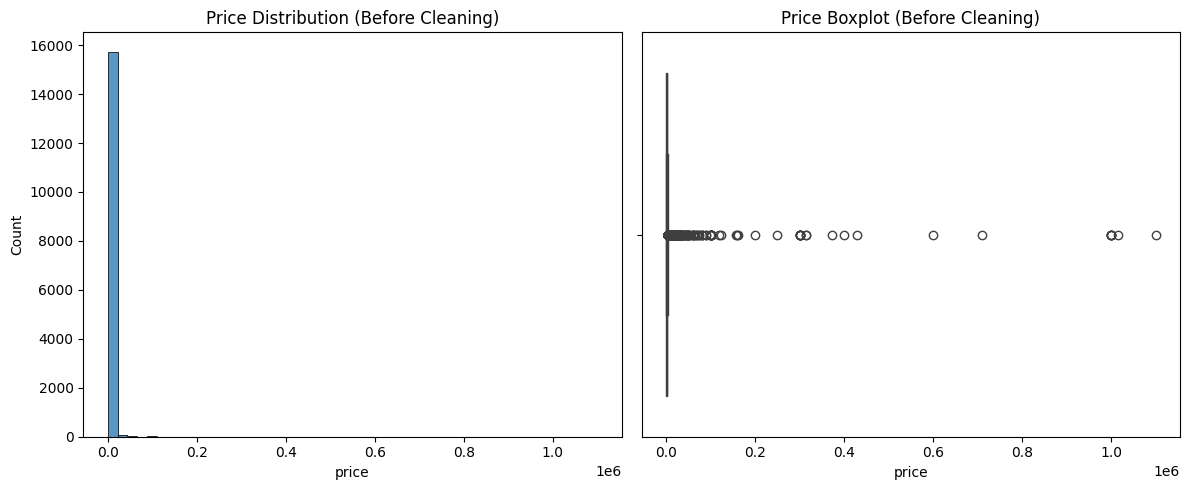

In [35]:
# price distribution before cleaning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], bins=50)
plt.title("Price Distribution (Before Cleaning)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['price'])
plt.title("Price Boxplot (Before Cleaning)")

plt.tight_layout()
plt.show()


Most listings are priced in the lower range (below 3,000 Baht). However, there is a maximum value reaching 1,100,000 Baht, which is highly unrealistic for the Airbnb market. In addition, there are listings with a price of 0 Baht, which is clearly not possible.

These extreme values are likely caused by input errors or unrealistic listings. Therefore, outliers in the `price` column need to be handled before proceeding with further analysis.

In [36]:
# remove outliers in the price column using the IQR method
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['price'] >= lower) & (df_clean['price'] <= upper)]
df_clean = df_clean[df_clean['price'] > 0]

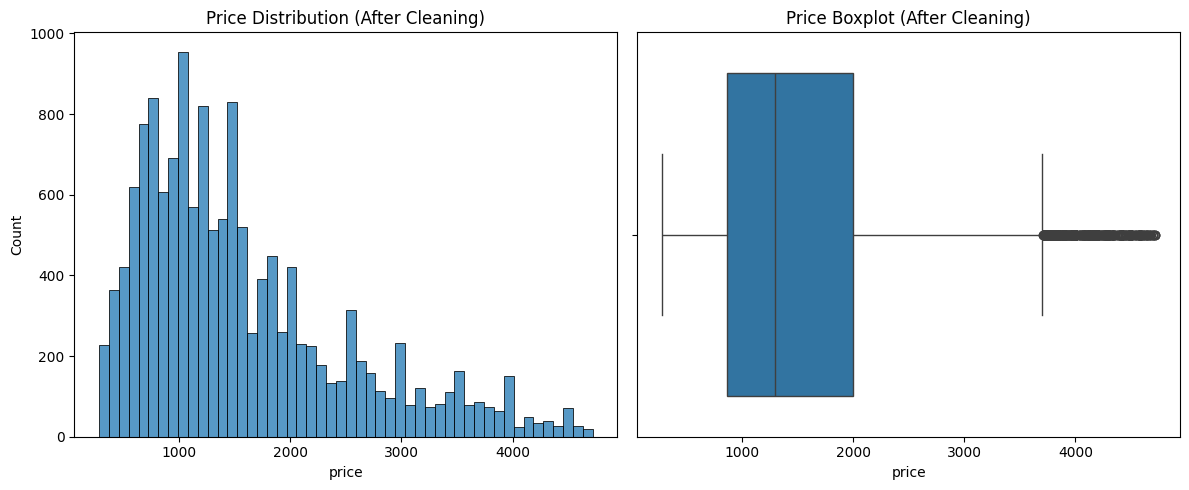

In [37]:
# price distribution after cleaning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], bins=50)
plt.title("Price Distribution (After Cleaning)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['price'])
plt.title("Price Boxplot (After Cleaning)")

plt.tight_layout()
plt.show()



After cleaning, the price distribution appears more stable and no longer has a long tail. This ensures that correlation analysis and price comparisons across locations become more accurate and reliable.

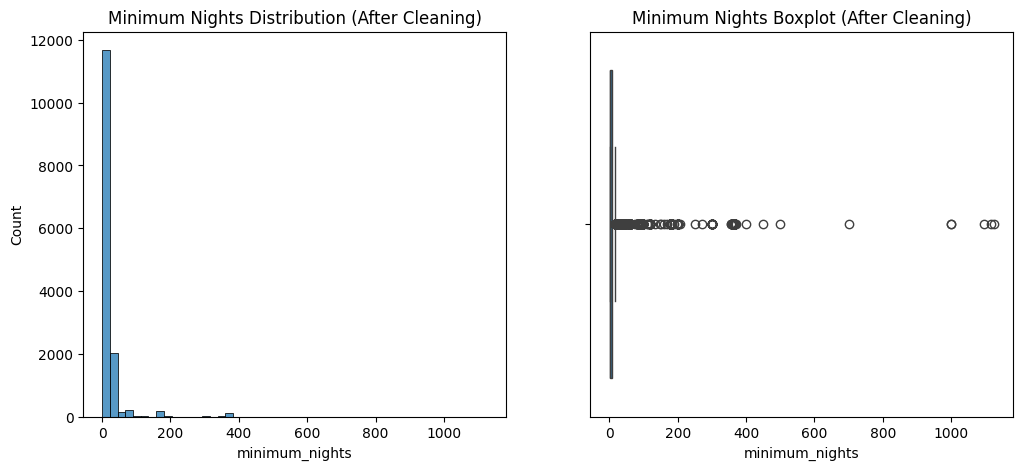

In [38]:
# minimum_nights distribution before cleaning
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_clean['minimum_nights'], bins=50)
plt.title("Minimum Nights Distribution (After Cleaning)")

plt.subplot(1,2,2)
sns.boxplot(x=df_clean['minimum_nights'])
plt.title("Minimum Nights Boxplot (After Cleaning)")

plt.show()



Most listings require only 1–7 nights. However, there is a maximum value of 1,125 nights (around 3 years), which is not realistic as a minimum stay for an Airbnb listing and is likely due to an input error. Therefore, this outlier should be removed.

In [39]:
# remove outliers in the minimum_nights column using the IQR method
Q1_m = df_clean['minimum_nights'].quantile(0.25)
Q3_m = df_clean['minimum_nights'].quantile(0.75)
IQR_m = Q3_m - Q1_m
upper_m = Q3_m + 1.5 * IQR_m

df_clean = df_clean[df_clean['minimum_nights'] <= upper_m]


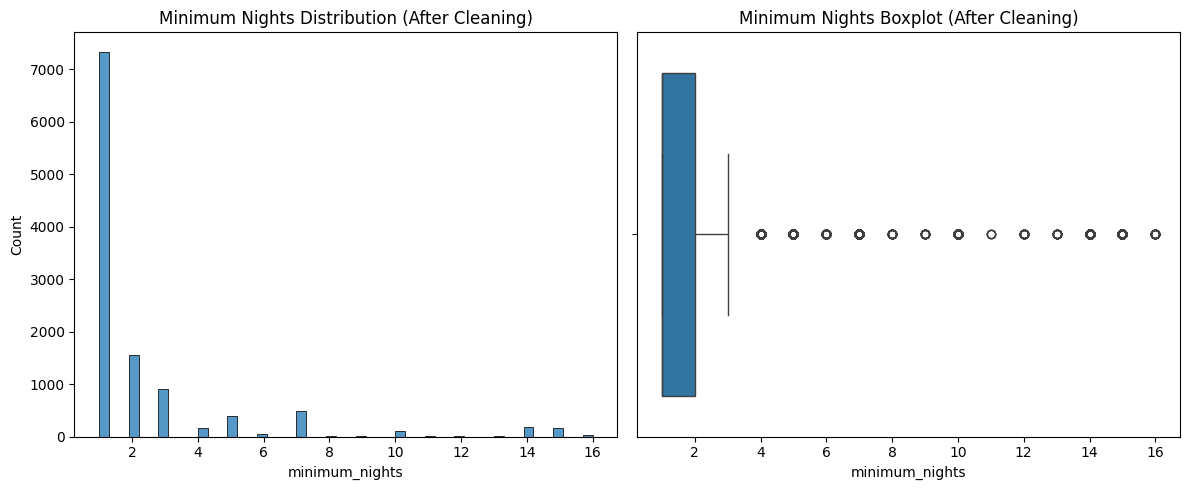

In [40]:
# minimum_nights distribution after cleaning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['minimum_nights'], bins=50)
plt.title("Minimum Nights Distribution (After Cleaning)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['minimum_nights'])
plt.title("Minimum Nights Boxplot (After Cleaning)")

plt.tight_layout()
plt.show()


After removing the extreme outliers, the distribution of minimum nights now better reflects the actual pattern, where most listings require 1 to 7 nights. This is important to ensure that the analysis of listing performance is not biased by extreme values caused by input errors.

In [41]:
df_clean.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,dist_city_center,dist_bts_siam,dist_mrt_sukhumvit,dist_grand_palace,dist_chatuchak
count,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000
mean,13.746968,100.559409,1617.566684,2.337703,18.222426,0.582452,245.632844,6.502403,6.452448,6.053350,9.079724,8.629277
std,0.044609,0.053586,971.571181,2.891614,43.796119,1.038309,125.987552,4.893255,4.886964,4.764567,5.465396,4.199286
min,13.527300,100.329550,278.000000,1.000000,0.000000,0.000000,0.000000,0.098502,0.110118,0.025733,0.199833,0.167956
25%,13.720492,100.527623,890.000000,1.000000,0.000000,0.000000,140.000000,3.260419,3.185096,2.698075,5.247529,5.872744
50%,13.739580,100.559845,1375.000000,1.000000,2.000000,0.110000,315.000000,5.028797,4.994848,5.044212,8.182074,8.188675
75%,13.761810,100.585040,2084.500000,2.000000,15.000000,0.810000,360.000000,8.259853,8.195508,7.725883,11.583980,10.531415
max,13.953540,100.923440,4720.000000,16.000000,1224.000000,19.130000,365.000000,42.832912,42.734446,40.268337,47.209276,40.181412


In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11442 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                11442 non-null  object  
 1   neighbourhood       11442 non-null  object  
 2   latitude            11442 non-null  float64 
 3   longitude           11442 non-null  float64 
 4   room_type           11442 non-null  category
 5   price               11442 non-null  int64   
 6   minimum_nights      11442 non-null  int64   
 7   number_of_reviews   11442 non-null  int64   
 8   reviews_per_month   11442 non-null  float64 
 9   availability_365    11442 non-null  int64   
 10  location_zone       11442 non-null  object  
 11  dist_city_center    11442 non-null  float64 
 12  dist_bts_siam       11442 non-null  float64 
 13  dist_mrt_sukhumvit  11442 non-null  float64 
 14  dist_grand_palace   11442 non-null  float64 
 15  dist_chatuchak      11442 non-null  float

In [43]:
info_df = pd.DataFrame({
    "Column": df_clean.columns,
    "Type": [df_clean[col].dtype for col in df_clean.columns],
    "Non-Null": [df_clean[col].count() for col in df_clean.columns],
    "Null": [df_clean[col].isnull().sum() for col in df_clean.columns],
})

info_df

,Column,Type,Non-Null,Null
0,name,object,11442,0
1,neighbourhood,object,11442,0
2,latitude,float64,11442,0
3,longitude,float64,11442,0
4,room_type,category,11442,0
5,price,int64,11442,0
6,minimum_nights,int64,11442,0
7,number_of_reviews,int64,11442,0
8,reviews_per_month,float64,11442,0
9,availability_365,int64,11442,0


In [44]:
df_clean.columns.tolist()

['name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365',
 'location_zone',
 'dist_city_center',
 'dist_bts_siam',
 'dist_mrt_sukhumvit',
 'dist_grand_palace',
 'dist_chatuchak']

# 8. Export

In [45]:
# save cleaned data set to new file
df_clean.to_csv("airbnb_bangkok_clean.csv", index=False, encoding="utf-8")

# 9. Analysis

## 9.1. Numerical Distribution Analysis

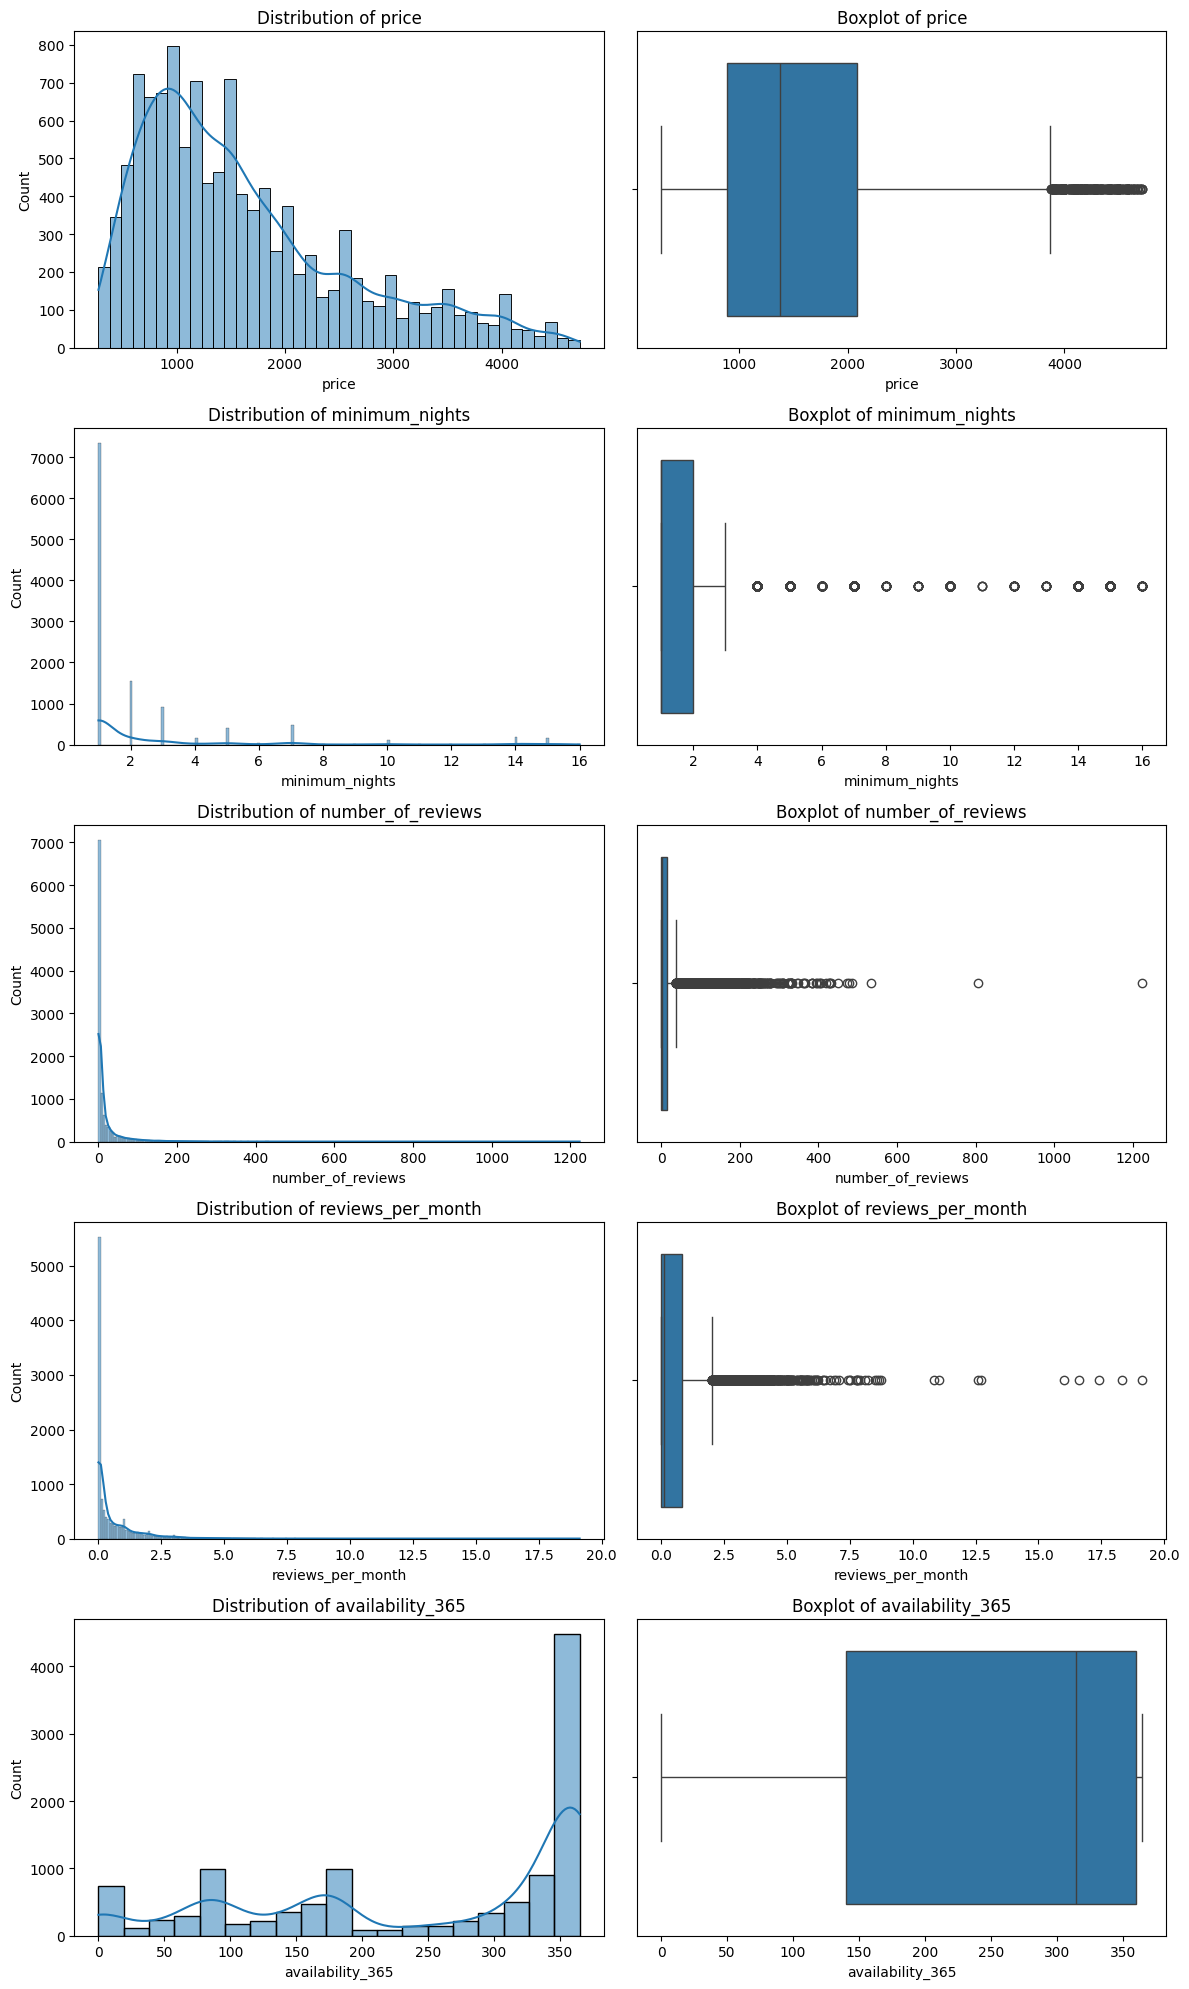

In [46]:
# distribution of numerical columns
num_cols = ['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']

fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 4 * len(num_cols)))

for i, col in enumerate(num_cols):
    
    sns.histplot(df_clean[col], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f"Distribution of {col}")

    sns.boxplot(x=df_clean[col], ax=axes[i,1])
    axes[i,1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Here, the main numeric distributions such as `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, and `availability_365` are visualized. Using subplots makes the results easier to read and compare.

## 9.2. Categorical Distribution Analysis

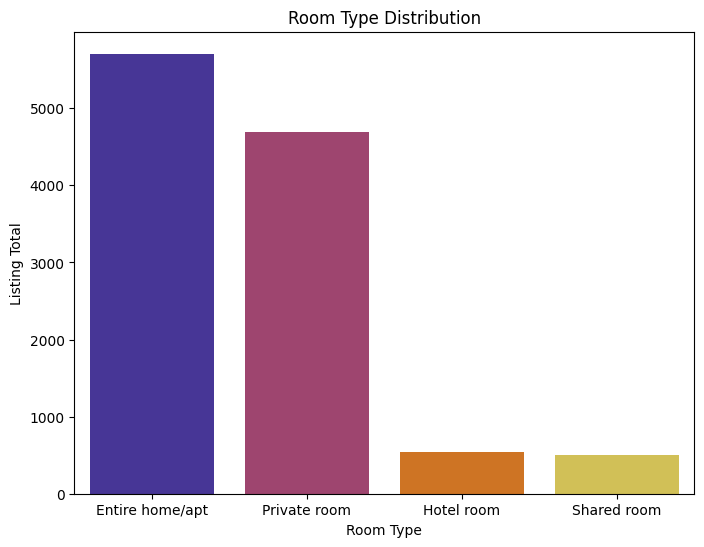

In [47]:
# room_type distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df_clean, x='room_type', order=df_clean['room_type'].value_counts().index, palette="CMRmap")
plt.title("Room Type Distribution")
plt.ylabel("Listing Total")
plt.xlabel("Room Type")
plt.show()

Most listings are houses/apartments.

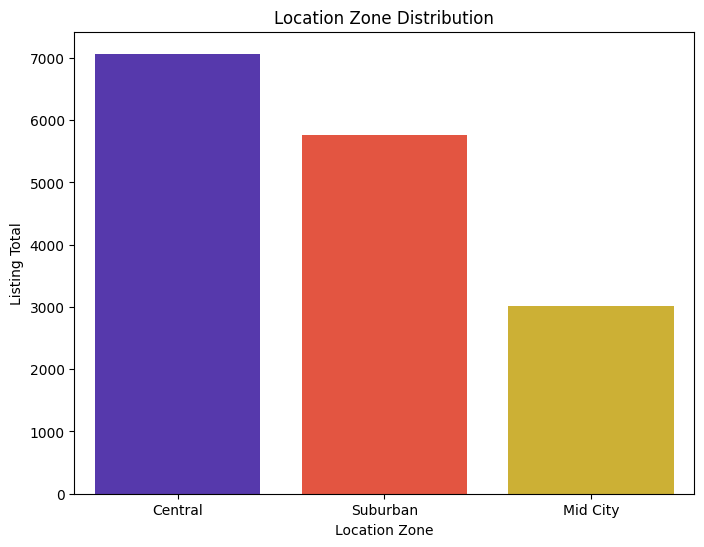

In [48]:
# location_zone distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='location_zone', order=df['location_zone'].value_counts().index, palette="CMRmap")
plt.title("Location Zone Distribution")
plt.ylabel("Listing Total")
plt.xlabel("Location Zone")
plt.show()

As we can see that the Central zone, there are more listings than in any other zone.

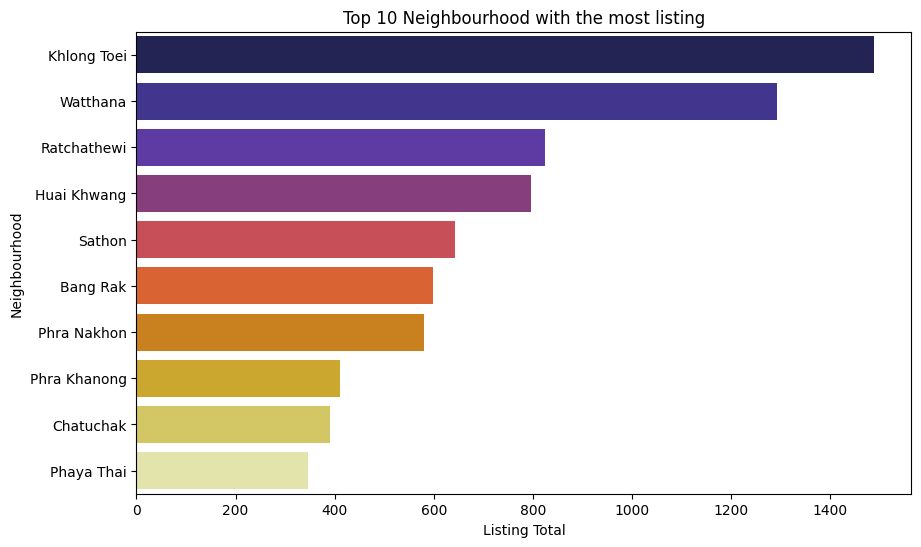

In [49]:
# count listing per neighbourhood
top10_neighbourhood = df_clean['neighbourhood'].value_counts().head(10)

# Bar plot horizontal
plt.figure(figsize=(10,6))
sns.barplot(x=top10_neighbourhood.values, y=top10_neighbourhood.index, palette="CMRmap")
plt.title("Top 10 Neighbourhood with the most listing")
plt.xlabel("Listing Total")
plt.ylabel("Neighbourhood")
plt.show()

This chart shows the top 10 neighbourhoods in Bangkok with the highest number of Airbnb listings. These areas represent the main supply centers, indicating the locations most preferred by hosts to rent out their properties.

## 9.3. Distance Analysis

### 9.3.1 Distance vs Price and Reviews per Month Analysis

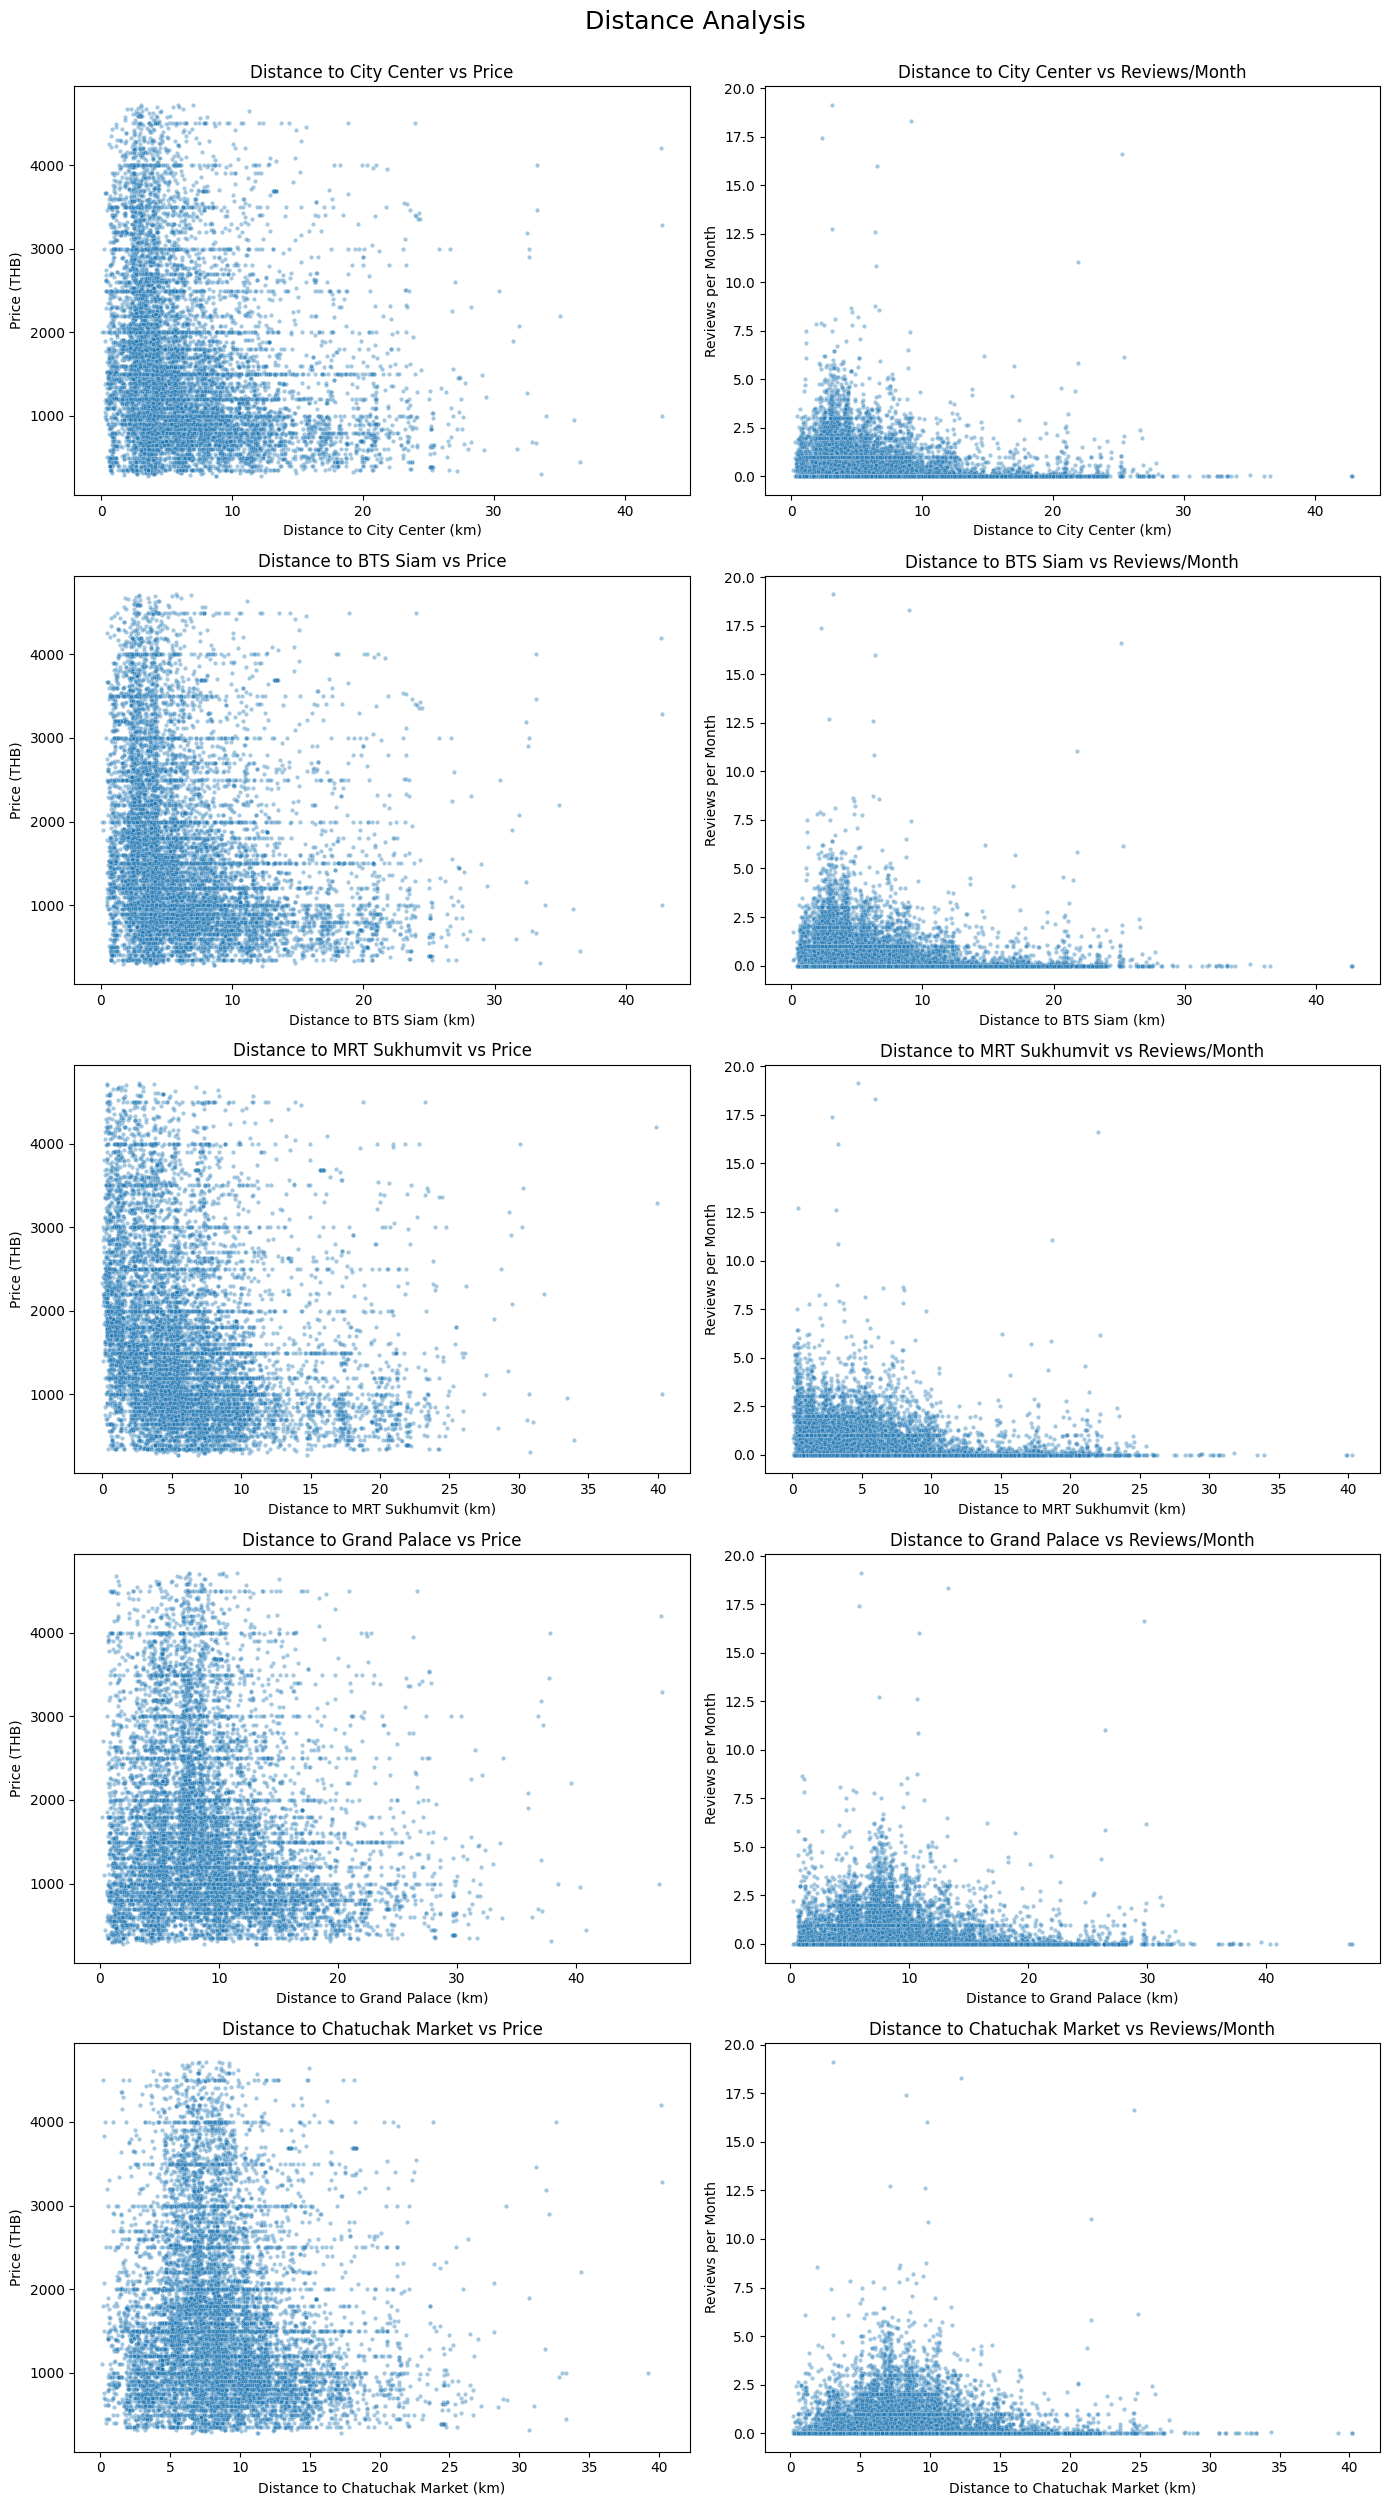

In [53]:
# distnace to landmarks vs price and reviews_per_month
landmarks = [
    ('dist_city_center', 'City Center'),
    ('dist_bts_siam', 'BTS Siam'),
    ('dist_mrt_sukhumvit', 'MRT Sukhumvit'),
    ('dist_grand_palace', 'Grand Palace'),
    ('dist_chatuchak', 'Chatuchak Market')
]

fig, axes = plt.subplots(5, 2, figsize=(14, 25))
fig.suptitle("Distance Analysis", fontsize=18, y=1.00)

for i, (col, label) in enumerate(landmarks):

    # LEFT: Distance vs Price
    sns.scatterplot(
        x=df_clean[col],
        y=df_clean['price'],
        ax=axes[i, 0],
        s=10, alpha=0.4
    )
    axes[i, 0].set_title(f"Distance to {label} vs Price")
    axes[i, 0].set_xlabel(f"Distance to {label} (km)")
    axes[i, 0].set_ylabel("Price (THB)")

    # RIGHT: Distance vs Reviews_per_month
    sns.scatterplot(
        x=df_clean[col],
        y=df_clean['reviews_per_month'],
        ax=axes[i, 1],
        s=10, alpha=0.4
    )
    axes[i, 1].set_title(f"Distance to {label} vs Reviews/Month")
    axes[i, 1].set_xlabel(f"Distance to {label} (km)")
    axes[i, 1].set_ylabel("Reviews per Month")

plt.tight_layout()
plt.show()


1. **City Center (dist_city_center)**

* The scatterplot shows a downward pattern: the farther a listing is from the city center, the lower the price and activity level (`reviews_per_month`) tend to be.
* Spearman correlation usually indicates a significant negative relationship.

2. **Public Transportation**
   **BTS Siam (dist_bts_siam) and MRT Sukhumvit (dist_mrt_sukhumvit)**

* These are major transport hubs → prices tend to be higher the closer a listing is to BTS and MRT stations.
* Listings located near BTS and MRT also tend to have higher review rates.

3. **Tourist Attractions**
   **Grand Palace (dist_grand_palace) and Chatuchak Market (dist_chatuchak)**

* Listings closer to these attractions tend to have higher prices and higher review rates.
* The correlations are significantly negative.
* This consistently shows a negative relationship with both price and reviews, meaning distance increases → performance decreases.

## 9.4. Correlation

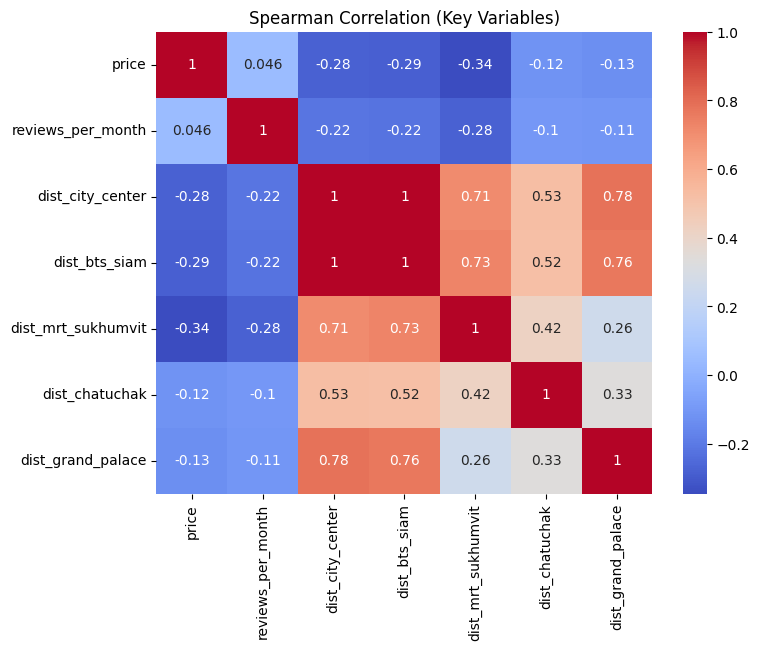

In [ ]:
# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[[
    'price','reviews_per_month','dist_city_center','dist_bts_siam',
    'dist_mrt_sukhumvit','dist_chatuchak','dist_grand_palace'
]].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title("Spearman Correlation (Key Variables)")
plt.show()


# 10. Inferential Statistics

Inferential statistics are used to test whether the patterns observed in the EDA are truly statistically significant, rather than just occurring by chance.

The main focus of this analysis is to examine whether distance to landmarks has a significant effect on:

* **Price**
* **Reviews_per_month**

## 10.1. Spearman Correlation

In [ ]:
# spearman correlation distance to landmarks vs price and reviews_per_month
for col, label in landmarks:
    rho_price, p_price = spearmanr(df_clean[col], df_clean['price'])
    rho_rpm, p_rpm = spearmanr(df_clean[col], df_clean['reviews_per_month'])

    print(f"=== Spearman with {label} ===")
    print(f"Price vs {col}: rho={rho_price:.3f}, p={p_price:.4f}")
    print(f"Reviews_per_month vs {col}: rho={rho_rpm:.3f}, p={p_rpm:.4f}")
    print()


=== Spearman with City Center ===
Price vs dist_city_center: rho=-0.278, p=0.0000
Reviews_per_month vs dist_city_center: rho=-0.217, p=0.0000

=== Spearman with BTS Siam ===
Price vs dist_bts_siam: rho=-0.286, p=0.0000
Reviews_per_month vs dist_bts_siam: rho=-0.223, p=0.0000

=== Spearman with MRT Sukhumvit ===
Price vs dist_mrt_sukhumvit: rho=-0.345, p=0.0000
Reviews_per_month vs dist_mrt_sukhumvit: rho=-0.277, p=0.0000

=== Spearman with Grand Palace ===
Price vs dist_grand_palace: rho=-0.131, p=0.0000
Reviews_per_month vs dist_grand_palace: rho=-0.108, p=0.0000

=== Spearman with Chatuchak Market ===
Price vs dist_chatuchak: rho=-0.116, p=0.0000
Reviews_per_month vs dist_chatuchak: rho=-0.102, p=0.0000



1. Airbnb prices in Bangkok are most strongly influenced by distance to modern transportation hubs (MRT/BTS), rather than tourist landmarks. This can be seen from the strongest negative correlations coming from the transport variables compared to the tourist attraction variables.

2. Reviews per month (a proxy for demand/occupancy) are also most influenced by access to MRT/BTS, rather than proximity to tourist landmarks.

# 11. Conclusion

1. Location is the strongest factor influencing both price and demand (`reviews_per_month`).
2. Modern transportation access (MRT Sukhumvit & BTS Siam) has a greater impact on listing performance compared to proximity to tourist landmarks such as the Grand Palace or Chatuchak.
3. Listings closer to MRT Sukhumvit tend to have:

   * Higher prices
   * Higher reviews per month (indicating better demand and occupancy)
4. Tourist landmarks show only a very small influence (rho < 0.13), making them less relevant as primary factors for pricing or demand.
5. The Bangkok Airbnb market is more sensitive to accessibility (mobility) than to sightseeing proximity.


# 12. Actionable Recommendations

1. **Prioritize Listings Near MRT/BTS**
   Listings located within <1 km of MRT Sukhumvit or BTS Siam are proven to have the best prices and performance. Focus expansion, promotion, and quality improvements in these areas.

2. **Apply Distance-Based Pricing**
   Use a tiered pricing strategy (premium – standard – value) based on distance to public transportation. This is the strongest factor influencing guests’ willingness to pay.

3. **Provide Promotions for Listings Far from Transport Access**
   Listings located far from the city center or public transport stations need boosting strategies such as long-stay discounts, improved facilities, or shuttle services.

4. **Highlight Transport Access in Marketing**
   Listing titles and descriptions should clearly emphasize transport access, for example: “Near MRT Sukhumvit,” “5 minutes walk to BTS,” or “Easy city access.” This is more effective than highlighting tourist landmarks.
